
##*SECTION 1*##
---
# PROJECT
AI 14 강인구

이번 노트는 아래의 구성으로 이뤄져 있습니다.

- **Part 0. Introduction** </br>
  0-1. 기획 배경

- **Part 1. EDA** </br>
  1-1. Data Description

- **Part 2. EDA** </br>
  2-1. 데이터 정제 </br>
  2-2. Feature Engineering </br>
  2-3. Log Transformation </br>
  2-4. Data Scaling </br>

- **Part 3. Build Clustering Model** </br>
  3-1. K-Means Clustering </br>
  3-2. Elbow Method </br>

- **Part 4. 클러스터별 특징 분석**

---

# 새 섹션

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [ ]:
# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()

In [11]:
games = pd.read_csv('vgames2.csv', sep=",")
games.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [12]:
#첫번째 unnamed:0은 인덱스와 겹치기에 삭제
games= games.drop(games.columns[[0]],axis=1)
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [13]:
print(f'Shape of dataset: {games.shape} \n')

games.info()

Shape of dataset: (16598, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB



1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# 데이터 정제

###**a. Name**

In [6]:
#결측치(missing value) 확인
games.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#년도에 대한 문제 
#판매량에 대한 문제: 기본 단위가 백만장인걸로 판단
#1000000
#테트리스 판매량으로 파악했습니다. 
#데이터판매량 K는 1000이므로 
#단위에 맞추어 
#K=1000/1000000
#K는 0.001로 수정합니다. 
#장르는 한번 확인해보고 진행
#판매사 파트는 삭제는 하지 않습니다.
#K: 1e-3

0.001

In [14]:
#df["A"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
games['NA_Sales']=games['NA_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['JP_Sales']=games['JP_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['Other_Sales']=games['Other_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)
games['EU_Sales']=games['EU_Sales'].replace({"K": "*1e-3","M":"*1","k":"*1e-3","m":"*1"},regex=True).map(pd.eval).astype(float)

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [16]:
games.Year.describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

(array([  100.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16227.]),
 array([   0.,  202.,  404.,  606.,  808., 1010., 1212., 1414., 1616.,
        1818., 2020.]),
 <a list of 10 Patch objects>)

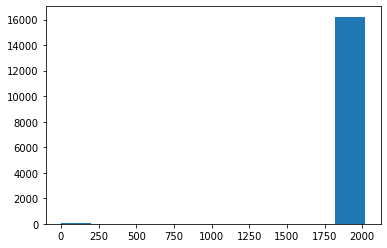

In [17]:
#year의 데이터를 보고 판단했을 떄 1980년도 부터 데이터를 시작하기에
#아래의 값은 삭제한다. 
#만약 프로젝트 기간동안 시간이 난다면 50년도 기준으로 
#이하면 +2000 이상이면 +1900하는 구조로 바꾼다. 단점은 데이터의 정확성을 문제이다.
plt.hist(games.Year)

In [18]:
#최초의 비디오게임은 1958년에 만들어졌기에 이하의 값은 삭제합니다.
delete_index = games[games.Year<1958].index
games= games.drop(index = delete_index)

In [19]:
games.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [20]:
#그 이후 결측치 제거도 진행한다. 271개를 다 찾을 수는 없기 떄문이다. 
games.dropna(subset=['Year'], inplace=True)
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [21]:
#판매량이 높은 게임 중에서 장르가 없는 경우가 거의 없고
#장르가 없는 것은 추측할 수 없기에 이 또한 삭제한다.
games.dropna(subset=['Genre'], inplace=True)
games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [ ]:
#퍼블리셔가 저희가 어떤 게임을 설계할까? 에 대한 문제에서 벗어나기에 결측치를 삭제하지 않습니다.


In [25]:
#1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
games_regeion=games.groupby(games.Genre)['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()
games_regeion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.265177,0.158773,0.048247,0.056890
Adventure,0.080142,0.050055,0.040924,0.013144
Fighting,0.265513,0.120290,0.104210,0.043546
Misc,0.235900,0.123735,0.061186,0.042855
Platform,0.510924,0.230277,0.149215,0.059065
Puzzle,0.216458,0.090161,0.100519,0.022165
Racing,0.292207,0.193562,0.045802,0.063000
Role-Playing,0.210617,0.120933,0.230624,0.037524
Shooter,0.450229,0.242319,0.029448,0.079511


<Figure size 7200x7200 with 0 Axes>

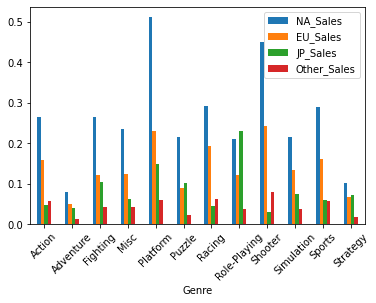

In [32]:
plt.figure(figsize=(100,100))
games_regeion.plot.bar(rot=0)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#1.   지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# NA(북아메리카)같은 경우 platform 게임을 제일 선호하고
# EU(유럽)같은 경우 shooter 게임을 제일 선호합니다.
# JP(일본) 같은 경우 role_playing 게임을 제일 선호합니다.
# Other(이외 지역)같은 경우 shooter 게임을 가장 선호합니다.

In [33]:
#2.   연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
game_all= games.copy()

In [58]:
game_all['All_Sales']= game_all['NA_Sales']+game_all['EU_Sales']+game_all['JP_Sales']+game_all['Other_Sales']


In [59]:
games_year=game_all.groupby(['Year','Genre'],as_index=False)['All_Sales'].mean()
games_year


,Year,Genre,All_Sales
0,1980.0,Action,0.340000
1,1980.0,Fighting,0.770000
2,1980.0,Misc,0.675000
3,1980.0,Shooter,3.535000
4,1981.0,Action,0.591600
...,...,...,...
383,2016.0,Sports,0.390811
384,2016.0,Strategy,0.052000
385,2017.0,Action,0.010000
386,2017.0,Role-Playing,0.020000


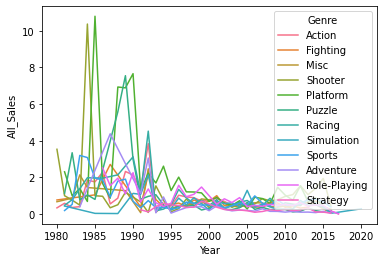

In [60]:
sns.lineplot(x='Year',y='All_Sales',data=games_year,hue='Genre')

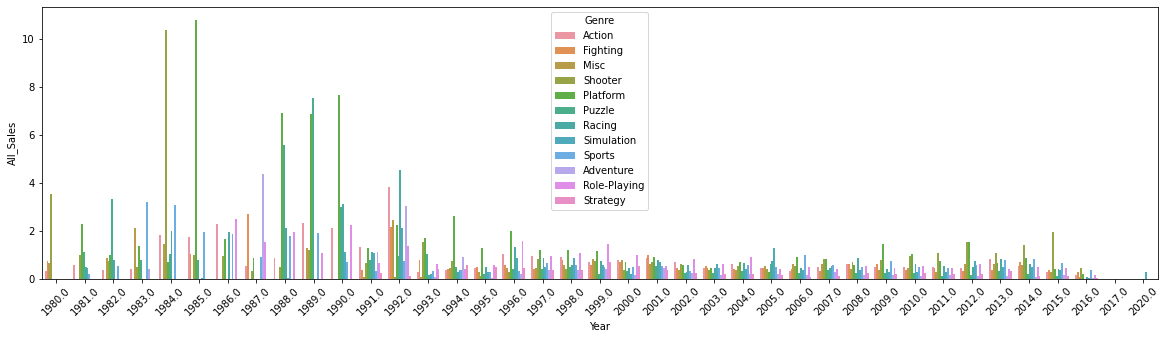

In [61]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x='Year',y='All_Sales',data=games_year,hue='Genre')

In [62]:
games_year2=game_all.groupby(['Year','Genre']).mean()
games_year2.drop(columns=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1)

All_Sales
Year   Genre                  
1980.0 Action         0.340000
       Fighting       0.770000
       Misc           0.675000
       Shooter        3.535000
1981.0 Action         0.591600
...                        ...
2016.0 Sports         0.390811
       Strategy       0.052000
2017.0 Action         0.010000
       Role-Playing   0.020000
2020.0 Simulation     0.290000

[388 rows x 1 columns]

In [65]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
game_asc= game_all.sort_values(by=['All_Sales'], ascending=False)
game_asc.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
#상위권 게임은 대부분 닌텐도가 만들었으며

In [66]:
game_100 = game_asc.head(100)